In [2]:
%load_ext itikz

# Probablistic P2P Content Moderation
## Propagation is a Liberating Constraint In The Acoustic Space

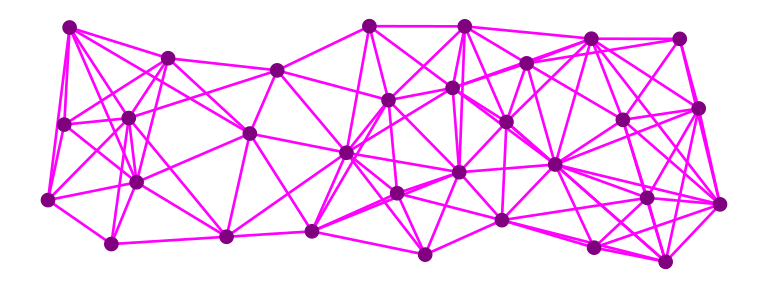

In [116]:
from IPython.display import Image

Image("imgs/mesh.png", metadata={
    "alt": "A mesh network"
})


---

> Ours is a brand new world of allatonceness. "Time" has ceased. "Space" has vanished. We now live in a global village...a simultaneous happening. We are back in acoustic space. We have begun again to structure the primordial feeling, the tribal emotions from which a few centuries of literacy divorced us. We have had to shift our stress of attention from action to reaction. [...] Electronic circuitry profoundly involves men with one another. Information pours upon us, instantaneously and continuously. Our electrically configured world has forced us to move from the habit of data classification to the mode of pattern recognition. We can no longer build serially, block-by-block, step-by-step, because instant communication insures that all the factors of the environment and of experience coexist in the state of active interplay.
>
> -- [The Medium Is The Message](https://amzn.to/38M7C3Z). McLuhan & Fiore (1967, p. 63)

---

## Start With A Goal of Synthesis

In my last post I argued that *what comes next* should be an [emphemeral-by-default, peer-to-peer, algorithmically-augmented](https://generativist.falsifiable.com/metaverse/what-should-social-look-like) social medium. A while before that, I started focusing on a different question: **how can we build a medium that can synthesize twitter's capabilities, albeit peer-to-peer**.^[The data used in [Dunbar's Number Is Quadratic](https://generativist.falsifiable.com/metaverse/dunbars-number-is-quadratic) was originally collected for that purpose. It was merely a convenient sample that I already had for that post.] I can't answer this question in a single post. More than that, I don't think I can answer it alone. But, I think it's useful to start by thinking about messages and their propagation.

Carving away extraneous detail, tweets are the atoms of the twitter universe. They bind a blob of content to an identity at a particular time. Likes and retweets are time and identity bound pointers to tweets. They socially allocate attention without content creation. Quote tweets, replies, and quoted replies are compounds. They bind a blob of content *and* a pointer (or two) to an identity at a particular time. Ignoring time and identity, these foundational interactions look like,

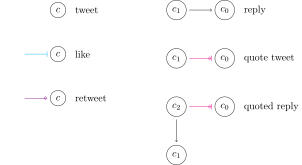

In [112]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=positioning,shapes,fit

\tikzset{
    tweet/.style={draw,circle},
    reply/.style={->, =>stealth, shorten <= 0.1cm, shorten >= 0.1cm, black}
}


\node[tweet] (c11) {$c$};
\node (c11_d) [right=0.2cm of c11] {tweet};

\node[tweet] (c21) [below=of c11] {$c$};
\node (c22) [left=of c21] {\phantom{like}};
\node (c22_d) [right=0.2cm of c21] {like};
\draw[-|, shorten <= 0.1cm, shorten >= 0.1cm, cyan] (c22) -- (c21);

\node[tweet] (c31) [below=of c21] {$c$};
\node (c32) [left=of c31] {\phantom{like}};
\node (c32_d) [right=0.2cm of c31] {retweet};
\draw[-<>, shorten <= 0.1cm, shorten >= 0.1cm,violet] (c32) -- (c31);

\node[tweet] (c41) [right=4cm of c11_d] {$c_0$};
\node[tweet] (c42) [left=of c41] {$c_1$};
\node (c42_d) [right=0.2cm of c41] {reply};
\draw[reply] (c42) -- (c41);

\node[tweet] (c51) [below=of c41] {$c_0$};
\node[tweet] (c52) [left=of c51] {$c_1$};
\node (c52_d) [right=0.2cm of c51] {quote tweet};
\draw[-<>|, shorten <= 0.1cm, shorten >= 0.1cm, magenta] (c52) -- (c51);

\node[tweet] (c61) [below=of c51] {$c_0$};
\node[tweet] (c62) [left=of c61] {$c_2$};
\node[tweet] (c63) [below=of c62] {$c_1$};
\node (c62_d) [right=0.2cm of c61] {quoted reply};
\draw[-<>|, shorten <= 0.1cm, shorten >= 0.1cm, magenta] (c62) -- (c61);
\draw[reply] (c62) -- (c63);

But, that is not the whole story. They joy of the medium is how users weave these interactions into a tapestry. Thus, if you want to synthesize twitter with P2P distribution, you can't only consider atomic message exchange. You need to think about sub-graph collation and propagation, too. Measured in bytes, these may not be large objects. But, measured in milliseconds, latency can add up quickly -- and **latency matters a lot**.

## Sharing Subgraphs

Assume each foundational interaction (message) has a unique content hash.^[Assuming cryptographic hash functions and messages with timestamps and (optional?) nonces, this is an easy assumption to satisfy. Since the pointers are also covered by the hash function, there is also a block chain/graph structure for some messages. But I don't think this should work via consensus (baring deliberate commits to a global ledger). My mental image is more like a soup of memes as unbound proteins.<br><br>] The P2P network allows you to query for hashes and the associated content. The actual content includes a reference to the users identity as well as a cryptographic signature of the message.^[The signature signs the hash, so it's not technically part of the message that gets digested. It's just stored and shared as a sibling of the content.<br><br>] Each node maintains a small subset of this data, conditional upon user and algorithmic requirements.

You have both the content $c_0$ and its associated hash $f(c_0)$. The content-associated identity allows you to connect to the author or their delegated proxy. Where squares refer to the identity (identitical in this case), you have the following thread,^[I'm using threads because they are the easiest to reason about, not because they are the only sub-graph shape.]

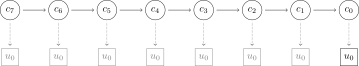

In [79]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=positioning,shapes,shapes.geometric,fit --as-jinja

\tikzset{
    tweet/.style={draw,circle},
    reply/.style={->, =>stealth, shorten <= 0.1cm, shorten >= 0.1cm, black},
    square/.style={regular polygon,regular polygon sides=4, inner sep=0.35mm}
}

{%  for i in range(8) %}
    {% if i > 0 %}
        \node[tweet] (c{{i}}) [left=of c{{i-1}}] {$c_{{i}}$};
        \draw[reply] (c{{i}}) -- (c{{i-1}});
        \node[draw,square,gray] (u{{i}}) [below=of c{{i}}] {$u_0$};
    {% else %}
        \node[tweet] (c{{i}}) {$c_{{i}}$};
        \node[draw,square] (u{{i}}) [below=of c{{i}}] {$u_0$};
    {% endif %}
    
    \draw[reply,densely dotted] (c{{i}}) -- (u{{i}});
{% endfor %}
%\draw[reply] (c42) -- (c41);


If the protocol supports an action like `retrieve_subgraph(c)` and you are connected to $u_0$, this is an $O(1)$ operation. 

Now consider the following thread,

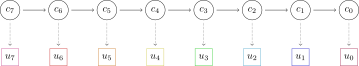

In [98]:
%%itikz --implicit-pic --temp-dir --tikz-libraries=positioning,shapes,shapes.geometric,fit --as-jinja
\tikzset{
    tweet/.style={draw,circle},
    reply/.style={->, =>stealth, shorten <= 0.1cm, shorten >= 0.1cm, black},
    square/.style={regular polygon,regular polygon sides=4, inner sep=0.35mm}
}

{%  for c in ["purple!60!gray", "blue!60!gray", "cyan!60!gray", "green!60!gray", "yellow!60!gray", "orange!60!gray", "red!60!gray", "magenta!60!gray"] %}
    {% set i = loop.index-1 -%}
    {% if i > 0 %}
        \node[tweet] (c{{i}}) [left=of c{{i-1}}] {$c_{{i}}$};
        \draw[reply] (c{{i}}) -- (c{{i-1}});
    {% else %}
        \node[tweet] (c{{i}}) {$c_{{i}}$};
    {% endif %}
    
    \node[draw,square,{{c}},text=black] (u{{i}}) [below=of c{{i}}] {$u_{{i}}$};
    \draw[reply,densely dotted] (c{{i}}) -- (u{{i}});
{% endfor %}
%\draw[reply] (c42) -- (c41);


What happens when you call `retrieve_subgraph(c)` for $c_0$ on $u_0$?

In the ideal case, $u_0$ returns the entire thread in $\mathcal{O}(1)$. Because messages are signed and contain pointers the relevant parents, authenticity of the result is cryptographically assured. However, if $u_0$ is is unaware of some inbound references or it has evicted them from its persistent stores and ephemeral buffers, the resulting view is incomplete in $\mathcal{O}(1)$.

***This incompleteness is not a bad thing.*** Two cases illustrate why,

- *Abuse*: If $c_1$ is abusive content replying to $c_0$,  $u_0$ is under no obligation to propagate it. $u_0$ created the context; they are in the best situation to moderate it. 

- *Indirect Criticism*: If $c_0$ is in some way bad and $u_1$ wants to comment on it without provoking $u_0$ or their followers,^[Screenshot tweets on twitter smell like a missing feature. But, I think there should be something like a detatched-head flag because I would probably let my agent filter out most of these interactions. I'd disable screenshot tweets if I could.] $u_1$ is under no obligation to notify $u_0$.

In the case of abuse, subscribers of $u_0$ and not $u_1$ benefit from the failure to propagate. Alternatively, subscribers of both are in the best position to evaluate and mediate (or ignore) the possible conflict. In the case of indirect criticism, the often self-perpetuating collision between identities and cliques is less likely to occur. 

## Incompleteness is Structure

**This local incompleteness does not imply inaccessibility**. For example,  consider the simple case where $u_0$ flushed its ephemeral buffers and chose not to retain the rest of the chain. 

- If the requester exhaustively queried each user on the graph, the cost of achieving completion would be a burdensome $\mathcal{O}(n)$.^[More likely, they would rely on a content accelerator intermediary. However, I assume those nodes augment the ecosystem at an additional cost to either the person making the query or the content producer, preserving incentives.] Unconditional queries are decidedly not social.

- If the requestor queried users in proportion to prior interaction frequencies -- and if nodes retained messages in proportion to time and interaction frequencies -- the upper-bound is still $n$. However, *the expected time until completion is much, much lower, as a property of the interaction graph*. Interaction proportional queries are inherently social.^[This argument works for propagation by gossip, too.]

Now, assume there is a maximum cost threshold for queries. This may be explicitly programmed or implicitly generated as a function of latency, which users robustly do not tolerate.^[The argument still works for gossip distribution assuming user's have finite resources and want to dedicate the minimum sufficient amount. This is a bit hand-wavy, but go on-board for [SSB](https://scuttlebutt.nz/) and you'll have a more visceral sense of how this is a useful constraint.] Assuming the heterogeneity of BYO algorithms and interfaces, this distribution does not lend itself to easy analysis. *That is a good thing!* The ragged landscape resists easy exploitation and manipulation. However, we can say something critical about the induced pressure -- **the probability of observing a message becomes a function of social peers willingness to propagate it.** 

Whether by algorithm or explicit action, this structure allows users to engage in both amplification and *attenuation*.  These probabilistic boundaries can be rendered sharper given the addition of inhibiting signals -- mutes and blocks operating at the level of either identity *or content*, functioning as something like antigens.^[I'm extremely biased here. After I finished my Ph.D. on belief systems and how they socially break down, I started working on a computational immune system for twitter via the API. Ignoring my conclusion -- [that I was building a sand castle on someone's private beach](https://generativist.falsifiable.com/metaverse/where-did-the-future-go) -- the API restricts made it extremely coarse. A lot of my motivation now is in making sure it's possible on what comes next.] The willingness to accept or ignore one of these attestations of harm is at the discretion of the user. Boundary spanners may ignore them or implement time decay, facilitating social graph healing. Those more vulnerable may enforce them rigorously, warding off harms. But, in both cases, [these boundaries are subject to continuous (re-)negotiation, rather than punctuated and durable ruptures](https://generativist.falsifiable.com/metaverse/centralized-social-partitions-considered-harmful).


The result is socially-shaped content propagation.^[You can go even further and have nodes that propagate some messages to only some people. It's a common social behavior. I think [Circles](https://en.wikipedia.org/wiki/Google%2B#Circles) didn't work because it was too rigid and effortful. But probablistic and conditional delivery is a huge opportunity.]  The decision not to propagate *is* a form of censorship. But, **it exists at something like the maximum margin between freedom of speech and freedom of reach.** Your time and attention are finite. The social graph structures it in useful ways. You need not abdicate your responsibilities and deliberation; but, you can collaborate for the purpose of socially-allocated attention. 


## Next Steps

The great power of social media is discovery. Social discovery depends on,

1. The willingness of inter-mediating paths to propagate a message;
2. The existence of ancillary curation services;
3. **The ability of peers to connect to each other or by proxy quickly**

I'm confident that (1) is not only viable, but the fundamental solution. I also believe (2) is a useful out-of-core service, that helps with heterogeneity and ensures the platform can evolve. The big issue is (3). Last year, I started building a platform to fill exactly this gap, but I set it aside. Now, it's time to pick it back up. **If you have expertise in building cryptographic distributed systems, I do want to hear from you.** In the meantime, I'm going continue doing ground work including building an empirically-constrained simulations to guide subsequent specification.

I'll be sharing more soon.

Follow me at [@generativist](https://twitter.com/generativist) if you're interested.^[I need to make a sub button / RSS for falsifiable still, but it's a lower priority at the moment.]